## The filtering of the signal is done here, the filtered signals are stored as smoothed_signal_file_{file number}.csv files 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, medfilt, savgol_filter

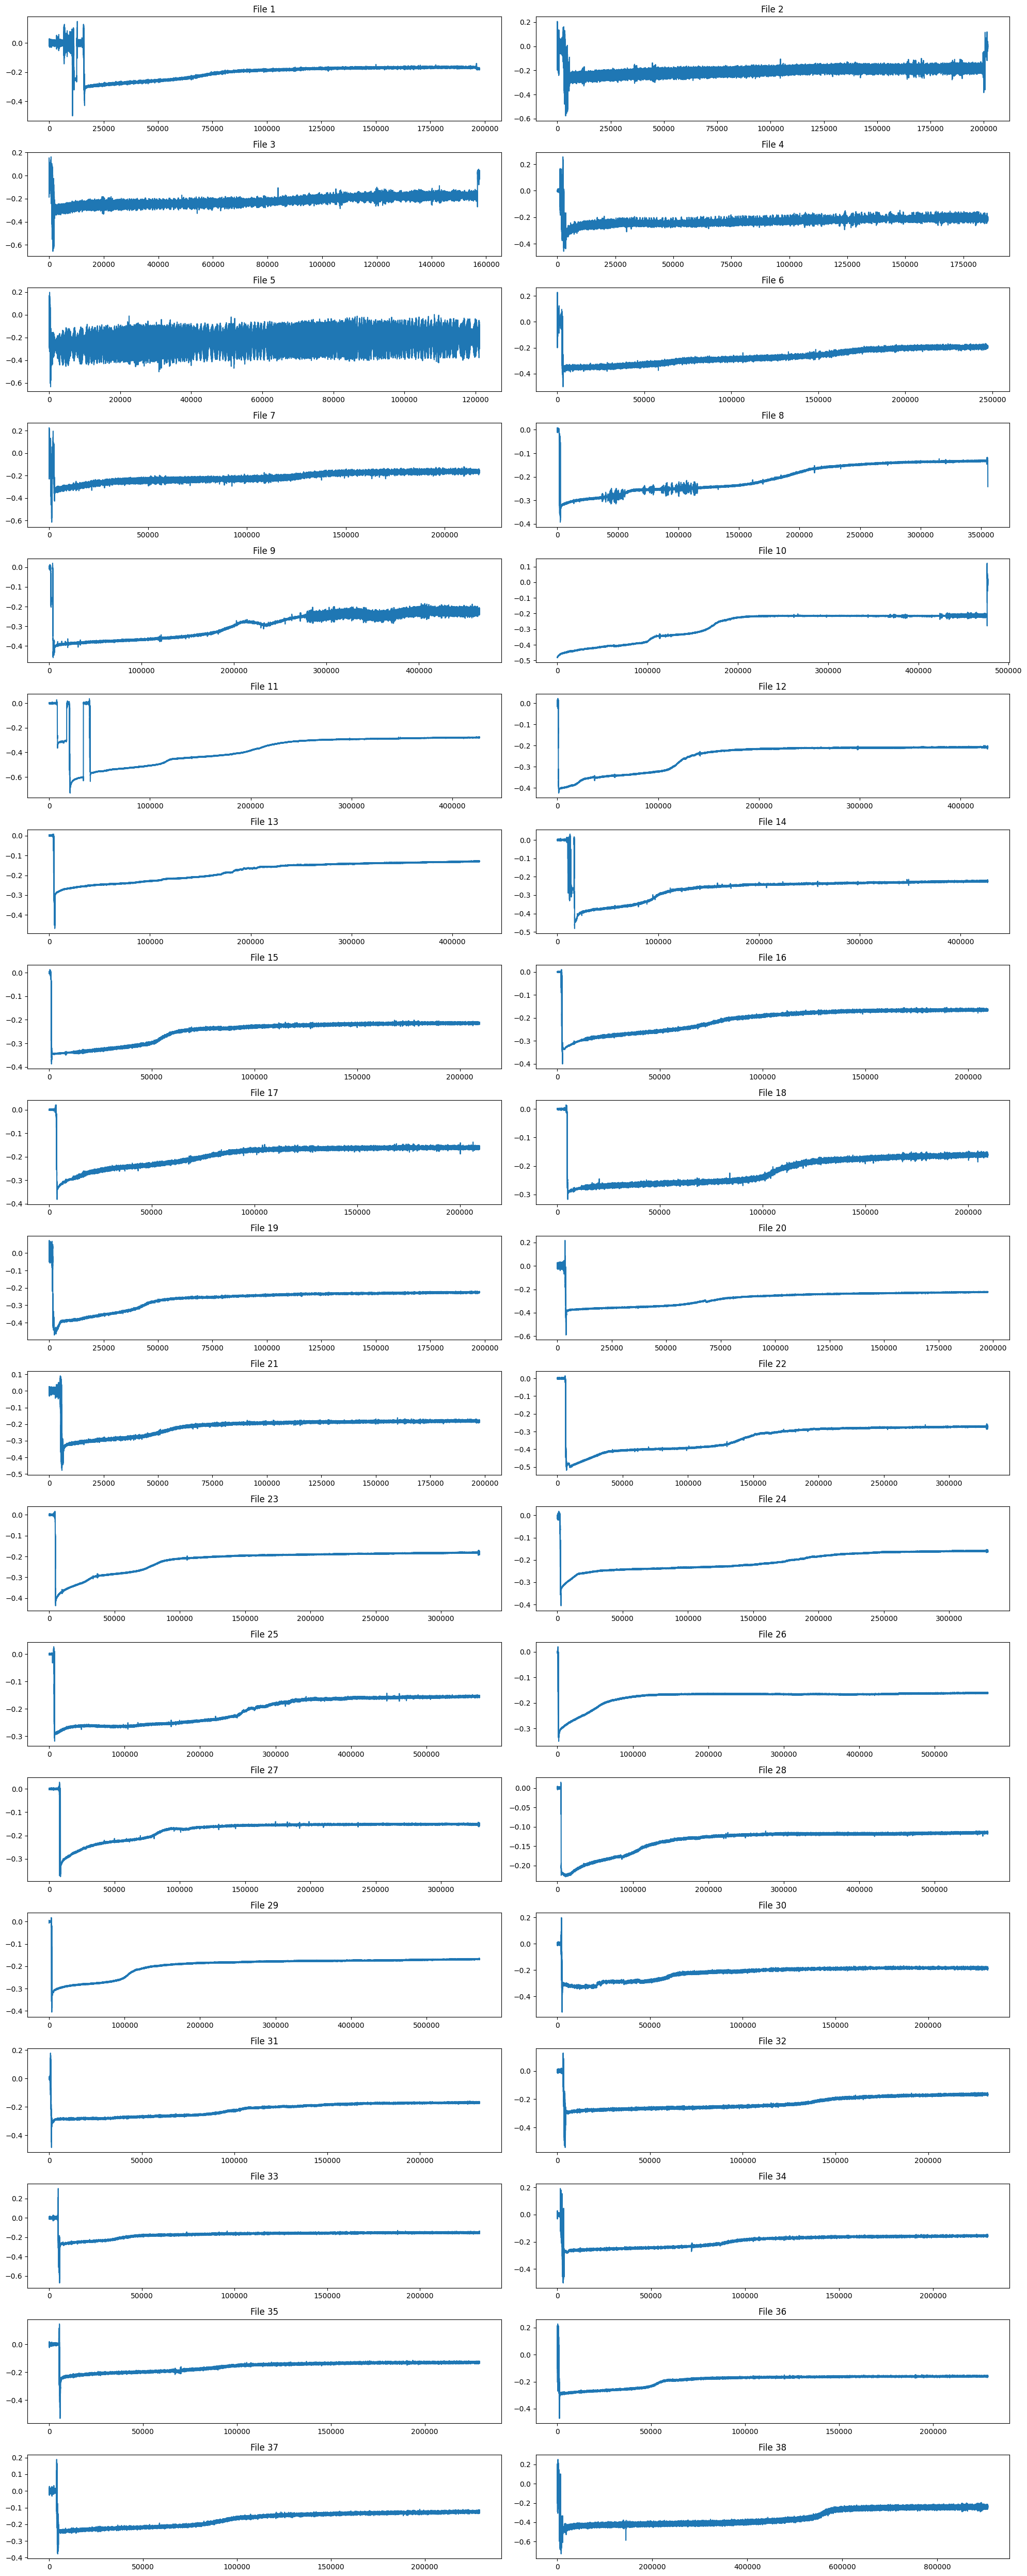

In [3]:
fig, axes = plt.subplots(19, 2, figsize=(20, 50))  # 19 rows, 2 columns for 38 files

for i, ax in enumerate(axes.ravel()):
    filename = f'./programming/{i+1}.csv'  
    try:
        data = pd.read_csv(filename)
        ax.plot(data['Raw Voltage'])
        ax.set_title(f'File {i+1}')  
    except FileNotFoundError:
        ax.set_axis_off()  # If file not found, hide the subplot

plt.tight_layout()
plt.show()

In [4]:
data = {}
smoothed_signal = {}
x = 1
y = 39
# total 38 files
for i in range(x, y):
    data[i] = pd.read_csv(f'./programming/{i}.csv')

sample_freq = 1000.0

cutoff_freq = 10.0

# Normalize the cut-off frequency
normalized_cutoff = cutoff_freq / (sample_freq / 2)

if normalized_cutoff >= 1:
    normalized_cutoff = 0.99  # Adjust to a value below 1 if it exceeds 1

filter_order = 4

b, a = butter(filter_order, normalized_cutoff, btype='low')

# Apply the filter to 'Raw Voltage' column for each file
for i in range(x, y):
    data[i]['Filtered Voltage'] = filtfilt(b, a, data[i]['Raw Voltage'])

# Apply median filter to each filtered signal
for i in range(x, y):
    data[i]['Smoothed Voltage'] = medfilt(data[i]['Filtered Voltage'], kernel_size=9)

for i in range(x, y):
    smoothed_signal[i] = savgol_filter(data[i]['Smoothed Voltage'], window_length=501, polyorder=3)

    plt.figure(figsize=(12, 6))
    plt.plot(smoothed_signal[i], label=f'File {i}')
    plt.title('Smoothed Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./programming/smoothed_signal_file_{i}.png')  
    plt.close() 

    smoothed_df = pd.DataFrame({'Smoothed Voltage': smoothed_signal[i]})
    smoothed_df.to_csv(f'./programming/smoothed_signal_file_{i}.csv', index=False)

print("done")


done
